# Define the Question

## a) Specify the Question

The aim of this practical is to go through the data science life cycle with the objective of determining what variables are significant in determining whether a patient has severe malaria or not.


## b) Metric of Success


## c) Context

## d) Experimental Design

# Import Libraries

In [0]:
#data manipulation
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px 

# show all columns and rows 
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 200)
pd.set_option('max_colwidth', 100)


# Reading the data

In [0]:
#load the dataset
biodata = pd.read_csv("biodata.csv")
clinical = pd.read_csv("clinical_examination.csv")
village = pd.read_csv("village_codes.csv")

In [0]:
#view the data
display(biodata.sample(7))
display(clinical.head())
village.tail()

,id,date_adm,hosp_id,sex,age_years,Age_mths2,village_name
11,12012,13-10-19,A,M,4,54,Samoya Central
12,12013,17-10-19,A,M,11,132,Ndengelwa
5,12006,21-09-19,A,M,0,2,Chebukwa
4,12005,19-09-19,A,F,9,108,Makutano
19,12020,31-10-19,B,M,12,144,Sang'alo
24,12025,27-11-19,C,M,7,84,Chemuche
21,12022,22-11-19,B,M,8,96,Nalondo


,id,fever,fever_dur,temp,BS_or_RDT_Ordered,BS_or_RDT_pos,convulsions,convulsions_no,hb1_order,hb1_result,transf_order,pallor,pallor_severe,indrawing,acidotic_breathing,avpu,blantyre_score,days_adm,outcome
0,12001,Yes,1.0,36.6,No,No,Yes,1.0,Yes,12.4,No,none,No,No,No,Alert,5.0,1,A
1,12002,Yes,3.0,40.0,Yes,Yes,Yes,1.0,Yes,12.2,No,none,No,No,No,Alert,5.0,3,A
2,12003,Yes,NaN,39.5,Yes,Yes,Yes,3.0,Yes,NaN,No,none,No,No,No,Alert,5.0,4,A
3,12004,Yes,3.0,36.7,Yes,No,No,NaN,Yes,13.7,No,none,No,No,No,Alert,5.0,1,A
4,12005,Yes,4.0,36.7,Yes,No,No,NaN,Yes,12.4,No,none,No,No,No,Alert,5.0,3,A


,village,code
20,Matongi,8661
21,Ranje,8236
22,Tuuti,8689
23,Nairumbi,8497
24,Kitinda,8886


# Data Understanding

**Clinical examination**

In [0]:
#total rows and columns
clinical.shape

#there exists 31 rows and 19 columns

(31, 19)

In [0]:
# check the data type
clinical.dtypes

#ths dataset consists of 2 integers,5 floats and 12 objects

id                      int64
fever                  object
fever_dur             float64
temp                  float64
BS_or_RDT_Ordered      object
BS_or_RDT_pos          object
convulsions            object
convulsions_no        float64
hb1_order              object
hb1_result            float64
transf_order           object
pallor                 object
pallor_severe          object
indrawing              object
acidotic_breathing     object
avpu                   object
blantyre_score        float64
days_adm                int64
outcome                object
dtype: object

In [0]:
# check for unique values per column

for (columnName, columnData) in clinical.iteritems():
       print('Colunm Name : ', columnName)
       print('Column Contents : ', columnData.unique())
    
    #this gives all the unique values in the columns
    

Colunm Name :  id
Column Contents :  [12001 12002 12003 12004 12005 12006 12007 12008 12009 12010 12011 12012
 12013 12014 12015 12016 12017 12018 12019 12020 12021 12022 12023 12024
 12025 12026 12027 12028 12029 12030 12031]
Colunm Name :  fever
Column Contents :  ['Yes' 'No' nan]
Colunm Name :  fever_dur
Column Contents :  [ 1.  3. nan  4.  2.  7.]
Colunm Name :  temp
Column Contents :  [36.6 40.  39.5 36.7 36.5 39.  39.8 38.5  nan 36.9 38.2 37.  38.6 38.7]
Colunm Name :  BS_or_RDT_Ordered
Column Contents :  ['No' 'Yes']
Colunm Name :  BS_or_RDT_pos
Column Contents :  ['No' 'Yes']
Colunm Name :  convulsions
Column Contents :  ['Yes' 'No' nan]
Colunm Name :  convulsions_no
Column Contents :  [ 1.  3. nan  2.]
Colunm Name :  hb1_order
Column Contents :  ['Yes' nan 'No']
Colunm Name :  hb1_result
Column Contents :  [12.4 12.2  nan 13.7  5.1  7.1  9.4 13.9 11.1  9.   7.4  6.3 12.7 12.8
 12.   1.8 11.4 10.5]
Colunm Name :  transf_order
Column Contents :  ['No' 'Yes' nan]
Colunm Name :  p

**Biodata**

In [0]:
#existing rows and columns
biodata.shape

#there are 35 rows and 7 columns

(35, 7)

In [0]:
#data types
biodata.dtypes
#it consists of 3 integers and 3 objects

id               int64
date_adm        object
hosp_id         object
sex             object
age_years        int64
Age_mths2        int64
village_name    object
dtype: object

In [0]:
#convert date_adm to date time
from datetime import datetime

#biodata['date_adm'] = datetime.strptime(biodata["date_adm"], ' %d %m %Y')
biodata['date_adm'] = pd.to_datetime(biodata['date_adm'], errors='coerce')

biodata.dtypes

id                       int64
date_adm        datetime64[ns]
hosp_id                 object
sex                     object
age_years                int64
Age_mths2                int64
village_name            object
dtype: object

In [0]:
#check for unique values in the data
for (columnName, columnData) in biodata.iteritems():
       print('Colunm Name : ', columnName)
       print('Column Contents : ', columnData.unique())
    
    #this gives all the unique values in the columns

Colunm Name :  id
Column Contents :  [12001 12002 12003 12004 12005 12006 12007 12008 12009 12010 12011 12012
 12013 12014 12015 12016 12017 12018 12019 12020 12021 12022 12023 12024
 12025 12026 12027 12028 12029 12030 12031 12032 12033 12034 12035]
Colunm Name :  date_adm
Column Contents :  ['2019-09-09T00:00:00.000000000' '2019-09-11T00:00:00.000000000'
 '2019-09-12T00:00:00.000000000' '2019-09-18T00:00:00.000000000'
 '2019-09-19T00:00:00.000000000' '2019-09-21T00:00:00.000000000'
 '2019-09-23T00:00:00.000000000' '2019-09-27T00:00:00.000000000'
 '2019-09-30T00:00:00.000000000' '2019-10-11T00:00:00.000000000'
 '2019-10-15T00:00:00.000000000' '2019-10-13T00:00:00.000000000'
 '2019-10-17T00:00:00.000000000' '2019-10-21T00:00:00.000000000'
 '2019-10-14T00:00:00.000000000' '2019-10-19T00:00:00.000000000'
 '2019-10-12T00:00:00.000000000' '2019-10-28T00:00:00.000000000'
 '2019-10-30T00:00:00.000000000' '2019-10-31T00:00:00.000000000'
 '2019-11-12T00:00:00.000000000' '2019-11-22T00:00:00.00

**Village**

In [0]:
# check the rows and columns
village.shape

(25, 2)

In [0]:
#data types
village.info()
# i integer and 1 object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   village  25 non-null     object
 1   code     25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


In [0]:
#check for unique values in the data
for (columnName, columnData) in village.iteritems():
       print('Colunm Name : ', columnName)
       print('Column Contents : ', columnData.unique())
    
    #this gives all the unique values in the columns

Colunm Name :  village
Column Contents :  ['Bukembe' 'Lwanda' 'Chemwa' 'Ndengelwa' 'Makutano' 'Chebukwa' 'Kitinda'
 'Muyayi' 'Sinoko' 'Samoya Central' 'Mutomolo' 'Sirare' "Sang'alo"
 'Walala' 'Chemuche' 'Namasanda' 'Namamuka' 'Khalaba' 'Nalondo' 'Matongi'
 'Ranje' 'Tuuti' 'Nairumbi']
Colunm Name :  code
Column Contents :  [8709 8238 8683 8766 8801 8619 8886 8774 8743 8876 8885 8637 8907 8853
 8795 8899 8942 8787 8538 8661 8236 8689 8497]


# Merge the datasets

Pandas uses “inner” merge by default. This keeps only the common values in both the left and right dataframes for the merged data.

In [0]:
#merge on their common column id
df = pd.merge(biodata,clinical,on = "id" , how='left')
#read the data
df.head()

,id,date_adm,hosp_id,sex,age_years,Age_mths2,village_name,fever,fever_dur,temp,BS_or_RDT_Ordered,BS_or_RDT_pos,convulsions,convulsions_no,hb1_order,hb1_result,transf_order,pallor,pallor_severe,indrawing,acidotic_breathing,avpu,blantyre_score,days_adm,outcome
0,12001,2019-09-09,A,M,7,84,Bukembe,Yes,1.0,36.6,No,No,Yes,1.0,Yes,12.4,No,none,No,No,No,Alert,5.0,1.0,A
1,12002,2019-09-11,A,M,5,66,Lwanda,Yes,3.0,40.0,Yes,Yes,Yes,1.0,Yes,12.2,No,none,No,No,No,Alert,5.0,3.0,A
2,12003,2019-09-12,A,F,7,84,Chemwa,Yes,NaN,39.5,Yes,Yes,Yes,3.0,Yes,NaN,No,none,No,No,No,Alert,5.0,4.0,A
3,12004,2019-09-18,A,M,7,92,Ndengelwa,Yes,3.0,36.7,Yes,No,No,NaN,Yes,13.7,No,none,No,No,No,Alert,5.0,1.0,A
4,12005,2019-09-19,A,F,9,108,Makutano,Yes,4.0,36.7,Yes,No,No,NaN,Yes,12.4,No,none,No,No,No,Alert,5.0,3.0,A


In [0]:
df.tail()

,id,date_adm,hosp_id,sex,age_years,Age_mths2,village_name,fever,fever_dur,temp,BS_or_RDT_Ordered,BS_or_RDT_pos,convulsions,convulsions_no,hb1_order,hb1_result,transf_order,pallor,pallor_severe,indrawing,acidotic_breathing,avpu,blantyre_score,days_adm,outcome
30,12031,2019-12-16,C,F,6,72,Ranje,Yes,7.0,38.5,Yes,Yes,No,NaN,Yes,10.5,No,mild/moderate,No,No,No,Alert,5.0,4.0,A
31,12032,2019-07-09,C,M,7,84,Tuuti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,12033,2019-07-12,C,M,4,50,Khalaba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,12034,2019-07-12,C,F,7,84,Nairumbi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,12035,2019-08-11,C,F,4,54,Kitinda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.shape

(35, 25)

In [0]:
#rename the column village 
df.rename({"village_name" : "village"},axis = 1, inplace = True)

In [0]:
#confirm
df.head()

,id,date_adm,hosp_id,sex,age_years,Age_mths2,village,fever,fever_dur,temp,BS_or_RDT_Ordered,BS_or_RDT_pos,convulsions,convulsions_no,hb1_order,hb1_result,transf_order,pallor,pallor_severe,indrawing,acidotic_breathing,avpu,blantyre_score,days_adm,outcome
0,12001,2019-09-09,A,M,7,84,Bukembe,Yes,1.0,36.6,No,No,Yes,1.0,Yes,12.4,No,none,No,No,No,Alert,5.0,1.0,A
1,12002,2019-09-11,A,M,5,66,Lwanda,Yes,3.0,40.0,Yes,Yes,Yes,1.0,Yes,12.2,No,none,No,No,No,Alert,5.0,3.0,A
2,12003,2019-09-12,A,F,7,84,Chemwa,Yes,NaN,39.5,Yes,Yes,Yes,3.0,Yes,NaN,No,none,No,No,No,Alert,5.0,4.0,A
3,12004,2019-09-18,A,M,7,92,Ndengelwa,Yes,3.0,36.7,Yes,No,No,NaN,Yes,13.7,No,none,No,No,No,Alert,5.0,1.0,A
4,12005,2019-09-19,A,F,9,108,Makutano,Yes,4.0,36.7,Yes,No,No,NaN,Yes,12.4,No,none,No,No,No,Alert,5.0,3.0,A


In [0]:
#assign the village codes
record = pd.merge(df,village,on = "village" , how='right',validate="many_to_many")

In [0]:
#read the data
record

,id,date_adm,hosp_id,sex,age_years,Age_mths2,village,fever,fever_dur,temp,BS_or_RDT_Ordered,BS_or_RDT_pos,convulsions,convulsions_no,hb1_order,hb1_result,transf_order,pallor,pallor_severe,indrawing,acidotic_breathing,avpu,blantyre_score,days_adm,outcome,code
0,12001,2019-09-09,A,M,7,84,Bukembe,Yes,1.0,36.6,No,No,Yes,1.0,Yes,12.4,No,none,No,No,No,Alert,5.0,1.0,A,8709
1,12002,2019-09-11,A,M,5,66,Lwanda,Yes,3.0,40.0,Yes,Yes,Yes,1.0,Yes,12.2,No,none,No,No,No,Alert,5.0,3.0,A,8238
2,12003,2019-09-12,A,F,7,84,Chemwa,Yes,NaN,39.5,Yes,Yes,Yes,3.0,Yes,NaN,No,none,No,No,No,Alert,5.0,4.0,A,8683
3,12004,2019-09-18,A,M,7,92,Ndengelwa,Yes,3.0,36.7,Yes,No,No,NaN,Yes,13.7,No,none,No,No,No,Alert,5.0,1.0,A,8766
4,12008,2019-09-27,A,F,4,51,Ndengelwa,Yes,1.0,39.8,Yes,Yes,No,NaN,Yes,9.4,No,mild/moderate,No,No,No,Alert,5.0,3.0,A,8766
5,12013,2019-10-17,A,M,11,132,Ndengelwa,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,D,8766
6,12005,2019-09-19,A,F,9,108,Makutano,Yes,4.0,36.7,Yes,No,No,NaN,Yes,12.4,No,none,No,No,No,Alert,5.0,3.0,A,8801
7,12016,2019-10-19,B,M,0,3,Makutano,Yes,2.0,36.9,Yes,Yes,No,NaN,Yes,6.3,Yes,severe,Yes,Yes,No,Alert,5.0,6.0,A,8801
8,12017,2019-10-12,B,M,0,2,Makutano,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,A,8801
9,12018,2019-10-28,B,F,5,60,Makutano,Yes,NaN,38.2,Yes,No,Yes,NaN,Yes,12.7,No,none,No,No,No,Alert,5.0,2.0,A,8801


In [0]:
#The records increased to 42 and i was expecting 35
print(record["id"].duplicated().sum())
#the id need to be unique for each individual

7


In [0]:
#drop the duplicates
record.drop_duplicates(inplace=True)

In [0]:
#confirm the code above
record.duplicated().sum()
#no existing duplicates in the dataset

0

In [0]:
#
record.shape

(35, 26)

In [0]:
record.sample(20)

,id,date_adm,hosp_id,sex,age_years,Age_mths2,village,fever,fever_dur,temp,BS_or_RDT_Ordered,BS_or_RDT_pos,convulsions,convulsions_no,hb1_order,hb1_result,transf_order,pallor,pallor_severe,indrawing,acidotic_breathing,avpu,blantyre_score,days_adm,outcome,code
40,12032,2019-07-09,C,M,7,84,Tuuti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8689
27,12014,2019-10-21,B,F,7,84,Mutomolo,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,D,8885
9,12018,2019-10-28,B,F,5,60,Makutano,Yes,NaN,38.2,Yes,No,Yes,NaN,Yes,12.7,No,none,No,No,No,Alert,5.0,2.0,A,8801
28,12015,2019-10-14,B,F,5,60,Sirare,Yes,4.0,39.0,Yes,No,Yes,3.0,Yes,7.4,Yes,severe,Yes,Yes,No,Pain response,2.0,9.0,A,8637
20,12009,2019-09-30,A,M,6,77,Kitinda,Yes,2.0,36.5,Yes,Yes,No,NaN,Yes,13.9,No,mild/moderate,No,No,No,Alert,5.0,2.0,A,8886
7,12016,2019-10-19,B,M,0,3,Makutano,Yes,2.0,36.9,Yes,Yes,No,NaN,Yes,6.3,Yes,severe,Yes,Yes,No,Alert,5.0,6.0,A,8801
37,12028,2019-12-29,C,F,6,72,Khalaba,Yes,2.0,38.6,Yes,Yes,No,NaN,Yes,1.8,Yes,severe,Yes,No,Yes,Unresponsive,0.0,1.0,D,8787
1,12002,2019-09-11,A,M,5,66,Lwanda,Yes,3.0,40.0,Yes,Yes,Yes,1.0,Yes,12.2,No,none,No,No,No,Alert,5.0,3.0,A,8238
2,12003,2019-09-12,A,F,7,84,Chemwa,Yes,NaN,39.5,Yes,Yes,Yes,3.0,Yes,NaN,No,none,No,No,No,Alert,5.0,4.0,A,8683
38,12033,2019-07-12,C,M,4,50,Khalaba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8787


# Data Preparation

## 1) Validity

Check for outliers in the dataset

In [0]:
#Get columns that only numerical
#This is neccesary since boxplots do not work for categorical data
record_num = df.select_dtypes(include = ['float64','int64'])
record_num.head()

,id,age_years,Age_mths2,fever_dur,temp,convulsions_no,hb1_result,blantyre_score,days_adm
0,12001,7,84,1.0,36.6,1.0,12.4,5.0,1.0
1,12002,5,66,3.0,40.0,1.0,12.2,5.0,3.0
2,12003,7,84,NaN,39.5,3.0,NaN,5.0,4.0
3,12004,7,92,3.0,36.7,NaN,13.7,5.0,1.0
4,12005,9,108,4.0,36.7,NaN,12.4,5.0,3.0


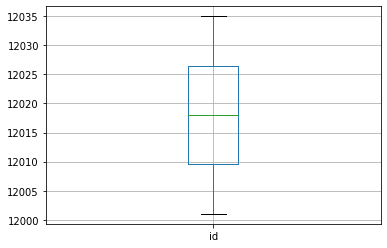

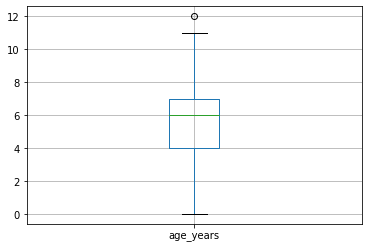

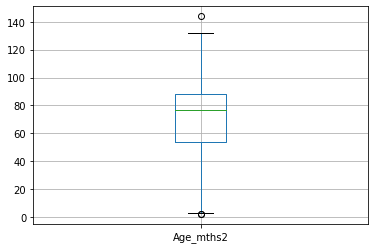

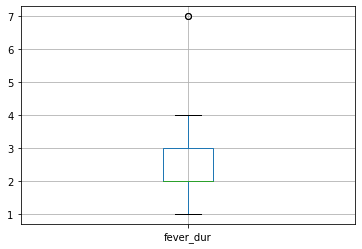

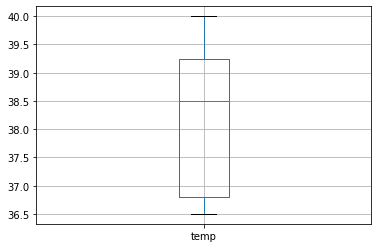

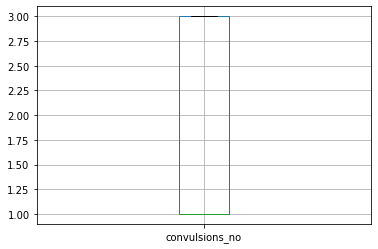

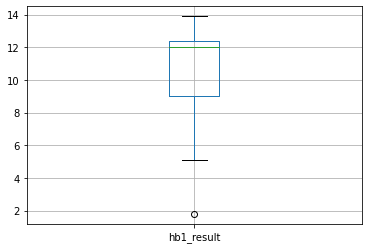

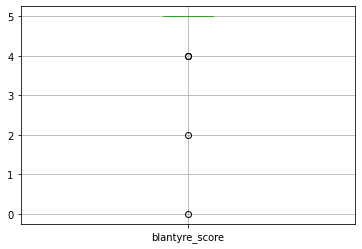

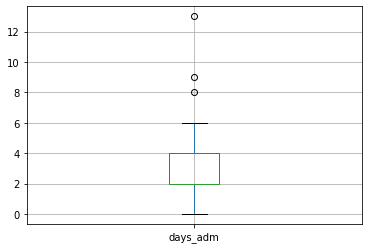

In [0]:
for column in record_num:
    plt.figure()
    record_num.boxplot([column])

## 2) Consistency

In [0]:
#check for duplicates
record.duplicated().sum()

0

## 3) Completeness

In [0]:
#missing values
record.isnull().sum()

id                     0
date_adm               0
hosp_id                0
sex                    0
age_years              0
Age_mths2              0
village                0
fever                 12
fever_dur             18
temp                  12
BS_or_RDT_Ordered      4
BS_or_RDT_pos          4
convulsions           12
convulsions_no        26
hb1_order             12
hb1_result            14
transf_order          12
pallor                12
pallor_severe         12
indrawing             12
acidotic_breathing    12
avpu                  12
blantyre_score        12
days_adm               4
outcome                4
code                   0
dtype: int64

In [0]:
record['fever'] = record['fever'].fillna("No",)
record['fever_dur']= record['fever_dur'].fillna(record['fever_dur'].mean())
record['temp']= record['temp'].fillna(record['temp'].mean())


In [0]:
record.describe()

,id,age_years,age_mths2,fever_dur,temp,convulsions_no,hb1_result,blantyre_score,days_adm,code
count,35.000000,35.000000,35.000000,17.000000,35.000000,9.000000,21.000000,23.000000,31.000000,35.000000
mean,12018.000000,6.000000,74.314286,2.705882,38.200000,1.777778,10.409524,4.565217,3.258065,8703.857143
std,10.246951,2.849148,33.238684,1.862951,1.012278,0.971825,3.195294,1.199473,2.707616,200.620529
min,12001.000000,0.000000,2.000000,1.000000,36.500000,1.000000,1.800000,0.000000,0.000000,8236.000000
25%,12009.500000,4.000000,54.000000,2.000000,38.200000,1.000000,9.000000,5.000000,2.000000,8649.000000
50%,12018.000000,6.000000,77.000000,2.000000,38.200000,1.000000,12.000000,5.000000,2.000000,8774.000000
75%,12026.500000,7.000000,88.000000,3.000000,38.650000,3.000000,12.400000,5.000000,4.000000,8801.000000
max,12035.000000,12.000000,144.000000,7.000000,40.000000,3.000000,13.900000,5.000000,13.000000,8942.000000


## 4) Uniformity 

In [0]:
#lower case
record.columns = map(str.lower, record.columns)
record.columns

Index(['id', 'date_adm', 'hosp_id', 'sex', 'age_years', 'age_mths2', 'village',
       'fever', 'fever_dur', 'temp', 'bs_or_rdt_ordered', 'bs_or_rdt_pos',
       'convulsions', 'convulsions_no', 'hb1_order', 'hb1_result',
       'transf_order', 'pallor', 'pallor_severe', 'indrawing',
       'acidotic_breathing', 'avpu', 'blantyre_score', 'days_adm', 'outcome',
       'code'],
      dtype='object')

# Exploratory Data Analysis

## 1) Univariate Analysis

**Numeric column**

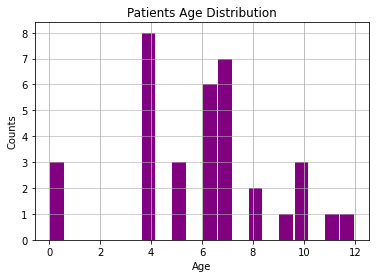

In [0]:
#patients age distribution
record["age_years"].hist(grid=True, bins=20, rwidth=0.9,
                   color='purple')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

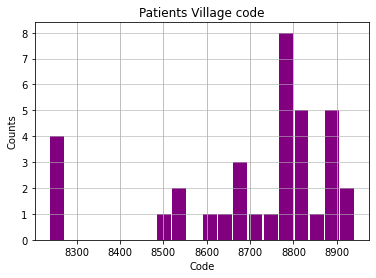

In [0]:
record["code"].hist(grid=True, bins=20, rwidth=0.9,
                   color='purple')
plt.title('Patients Village code')
plt.xlabel('Code')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

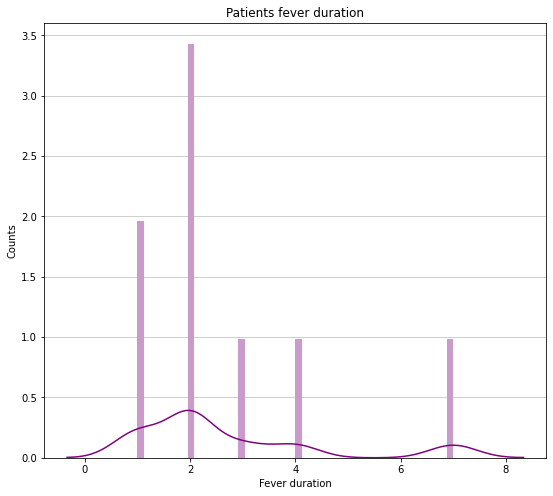

In [0]:
plt.figure(figsize=(9, 8))
sns.distplot(record['fever_dur'], color='purple', bins=50, hist_kws={'alpha': 0.4});
plt.title('Patients fever duration')
plt.xlabel('Fever duration')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
#its  is skewed to the right 


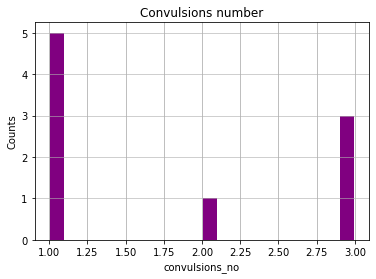

In [0]:
record["convulsions_no"].hist(grid=True, bins=20, rwidth=0.9,
                   color='purple')
plt.title('Convulsions number')
plt.xlabel('convulsions_no')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

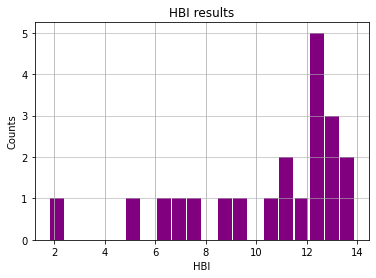

In [0]:
#patients human blood Index
record["hb1_result"].hist(grid=True, bins=20, rwidth=0.9,
                   color='purple')
plt.title('HBI results')
plt.xlabel('HBI')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

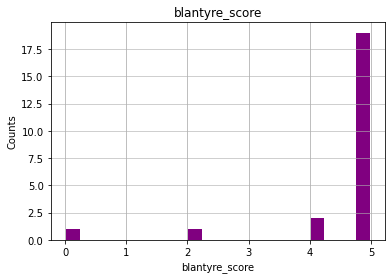

In [0]:
#patients human blood Index
record["blantyre_score"].hist(grid=True, bins=20, rwidth=0.9,
                   color='purple')
plt.title('blantyre_score')
plt.xlabel('blantyre_score')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)


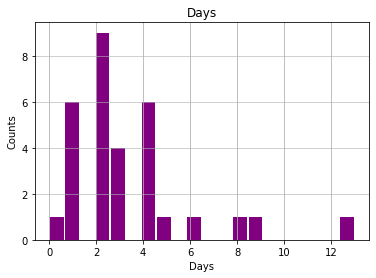

In [0]:
record["days_adm"].hist(grid=True, bins=20, rwidth=0.9,
                   color='purple')
plt.title('Days')
plt.xlabel('Days')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

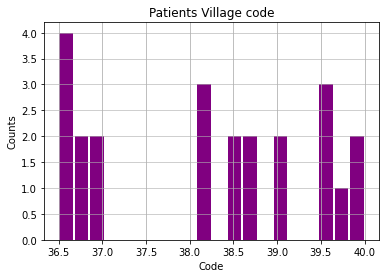

In [0]:
record["temp"].hist(grid=True, bins=20, rwidth=0.9,
                   color='purple')
plt.title('Patients Village code')
plt.xlabel('Code')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

**Categorical columns**

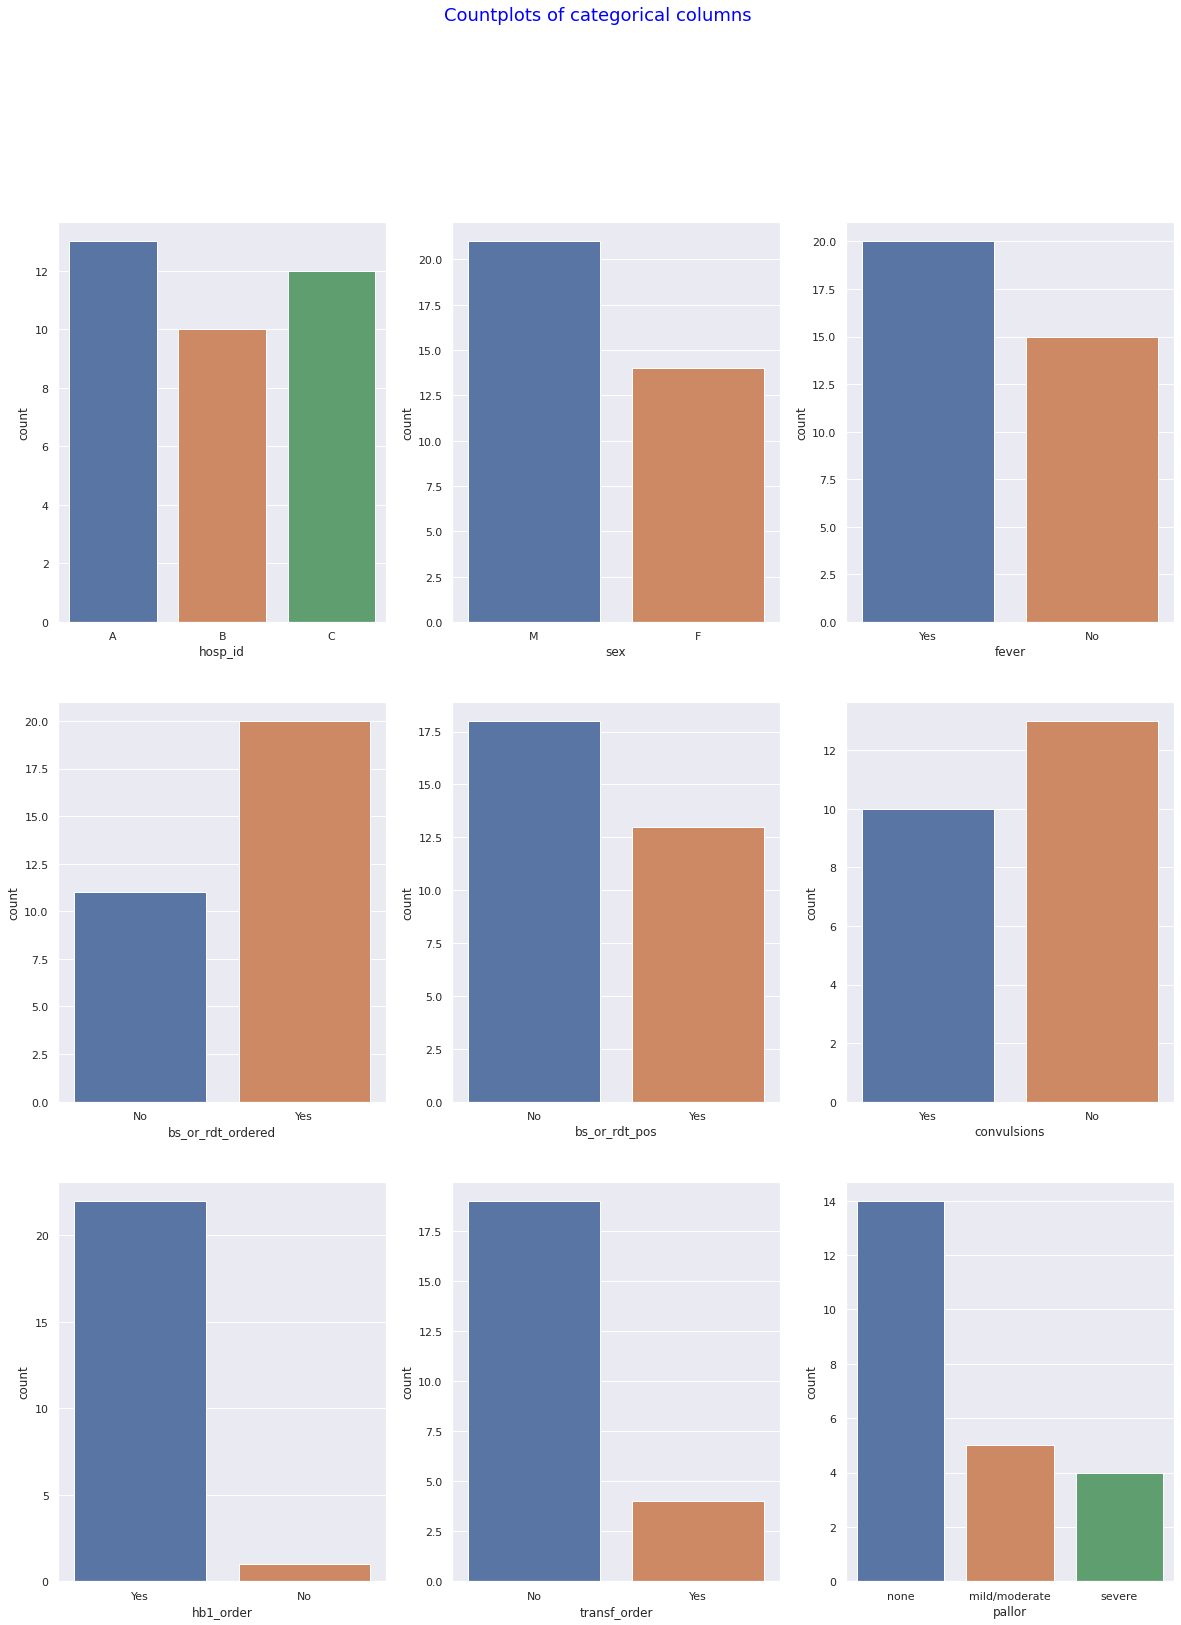

In [0]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

categorical = ['hosp_id', 'sex','fever','bs_or_rdt_ordered','bs_or_rdt_pos', 'convulsions', 'hb1_order','transf_order','pallor', 'pallor_severe', 'indrawing', 'acidotic_breathing', 'avpu']            


sns.set(style = 'darkgrid', context = 'notebook')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), record, categorical):
   sns.countplot(record[column], ax=ax)
for label in subplot.get_xticklabels():
  label.set_rotation(90)

## 2) Bivariate Analysis

## 3) Multivariate analysis